In [12]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [8]:
# 데이터를 저장할 디렉토리 경로 

import os
datapath = os.path.join("../data", "lifesat", "")

# 깃허브 데이터 다운로드
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

----

# 선형회귀모델 Regression
---

데이터를 설명하거나 미래 결과를 예측하기 위해 데이터로 부터 모델을 만듭니다. 모델링할 데이터가 선형 관계를 나타내는 것처럼 보이면, 그 관계를 설명하기 위해 linear model(선형 모델)을 사용합니다. 선형 모델의 개념은 간단합니다.

Data 를 가장 잘 설명하는 직선을 찾는것.
이미 이전에 plotting 파트에서 회귀직선을 포함하는 scatterplot 에서 그 부분을 확인했었습니다.

In [47]:
# 예제 코드

#  필요 라이브러리 import 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model # 선형회귀 모델 패키지

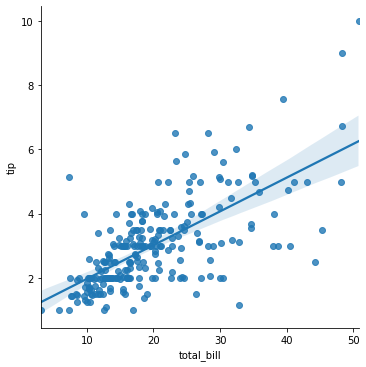

In [61]:
tips = sns.load_dataset('tips')


fig = sns.lmplot(x='total_bill',y='tip',data=tips)

In [48]:
# 데이터 로드

oecd_bil = pd.read_csv("../data/lifesat/oecd_bli_2015.csv", thousands=",")
gdp_per_capita = pd.read_csv("../data/lifesat/gdp_per_capita.csv", thousands=",", delimiter="\t",
                            encoding="latin1", na_values="n/a")

# delimimiter = "\t"  csv파일 탭 구분

In [49]:
# 데이터 준비

# 앞서 작성한 함수로 두 df를 병합
country_stats = prepare_country_stats(oecd_bil, gdp_per_capita)

country_stats.to_csv("../data/country_stats.csv")

In [50]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [51]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [52]:
# np.c_ 함수는 여러 넘파이 배열을 행으로 붙여주는 역할을 하는 함수

# [1, 2, 3], [4, 5, 6] ---> [[1, 4], [2, 5], [3, 6]]
# [1, 2, 3] ---> [[1], [2], [3]]

# 사이킷런 함수는 입력데이터가 2차원 배열로 각 샘플로 레코드가 행으로 되어있고 특성들이 열에 있다고 가정하기 때문에 2차원 배열로 변환해 주어야 한다.

# 더 자주 사용하는 방버!
# 열이 하나인 2차원 배열로 만드는 방법
# country_stats["Life satisfaction"].to_numpy().reshape(-1, 1)

# 사이킷런에서 관습적으로 입력데이터는 2차원배열로 행렬처럼 생각하고 타겟 데이터(정답)은 1차원 배열로 간주하고 X,y로 사용합니다.

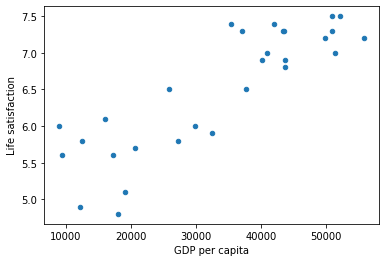

In [53]:
# 데이터 시각화

country_stats.plot(kind="scatter", x="GDP per capita", y="Life satisfaction")
plt.show()

In [55]:
# 선형 모델 선택
# 이렇게 머신러닝 모델을 만든다는 것은 머신러닝 라이브러리의 클래스의 객체를 만들어서 사용한다는 의미입니다.

model = sklearn.linear_model.LinearRegression()

# 모델 훈련(Fit)

model.fit(X, y)

LinearRegression()

In [56]:
# 키프로스(국가)에 대한 예측
# 사이킷런에서는 [[]] 형태로 데이터를 넘겨주면 자동으로 넘파이 배열로 변환시켜줍니다.

X_new = [[22587]] # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[5.96242338]]

[[5.96242338]]


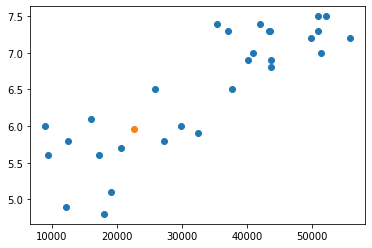

In [57]:
# 키프로스 삶의 만족도 예측 시각화

plt.scatter(X, y)
plt.scatter(22587, 5.96)
plt.show()

In [58]:
# coef는 기울기  intercept는 y절편
[model.coef_,model.intercept_]

[array([[4.91154459e-05]]), array([4.8530528])]

회귀 직선을 나타내는 법은 알았으나, 이 회귀 직선이 무엇을 의미하고 어떤 방정식에 의해 그려졌는지 알아볼 필요가 있습니다. 회귀식을 알 수 있다면 total bill에 대한 예상 tip을 알 수 있는 것처럼, 수치를 대입하여 새로운 변수값을 예측할 수 있습니다.

회귀 식은 보통 다음과 같습니다.

`𝑦=w𝑥+𝑏`
 
y 는 우리가 예측하고자 하는 값입니다. 
(종속변수 혹은 반응변수라고도 합니다),

x 는 예측을 위해 사용하는 값입니다. 
(독립변수, 설명변수, 예측변수 라고도 합니다.),

w은 선의 기울기를 의미합니다.

b 는 y 절편을 의미합니다.

In [59]:
f = lambda x: model.intercept_ + (model.coef_ * x)

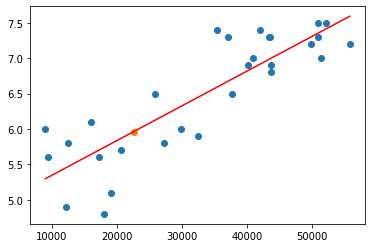

In [60]:
# 키프로스 삶의 만족도 예측 시각화

plt.scatter(X, y)
plt.scatter(22587, 5.96)
plt.plot(X, f(X), color = 'r')
plt.show()

# 최적의 선형식을 추정하는 방법

---

지금까지 sklearn의 선형회귀를 통해서 최적의 선형식을 구해보았습니다. 그렇다면 이번에는 최적의 선형식을 어떻게 구할 수 있는지에 대해 알아보겠습니다.

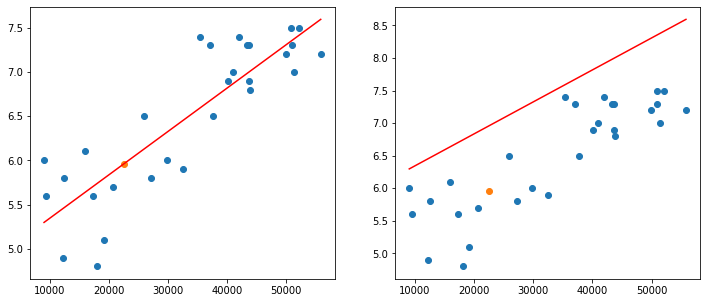

In [71]:
# 키프로스 삶의 만족도 예측 시각화

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X, y)
plt.scatter(22587, 5.96)
plt.plot(X, f(X), color = 'r')

plt.subplot(122)
plt.scatter(X, y)
plt.scatter(22587, 5.96)
plt.plot(X, f(X)+1, color = 'r')
plt.show()

위에서 살펴보았던 삶의 만족도와 관련된 선형식입니다. 

위와 같이 두 선형식이 존재할 때 과연 어떤 선형식이 미래의 데이터를 더 잘 예측할 수 있을까요?

성능이 좋은 선형식을 판단하는 수치적인 기준은 무엇일까요?

## Error
---


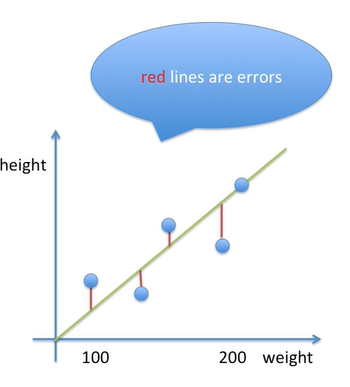

선형식을 추정하는 방법으로 `최소제곱법(Method of Least Square)` 라는 개념이 사용됩니다.

최소 제곱법이란 실제 데이터(관측값)과 예측값 사이의 오차(Error)의 `제곱 합(SSE, Sum of square error)`이 최소가 되는 식을 구하는 방법으로 이 식은 기울기에 해당합니다.

즉, 머신러닝을 통한 선형회귀를 구한다는 것은 해당 데이터(관측값)를 따르는 최고의 w와 b를 찾는 것입니다.

`y = wx + b`

이 때 최적의 선형식을 찾기 위한 방법으로 선형식과 실제 데이터의 차이를 수치적으로 나타내기 위해 Error 라는 개념을 사용합니다.

Error는 실제 데이터와 선형식과의 거리를 의미합니다.

위 도표에서 빨간 선으로 그려진 선이 Error입니다.

## SSE (Sum Of Square Error)
---

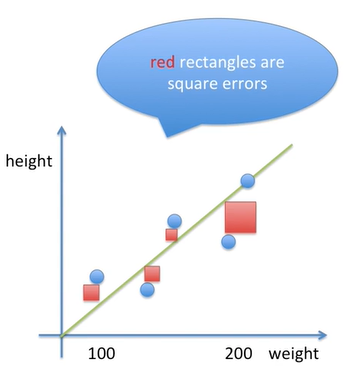

SE는 각 데이터의 잔차를 제곱해 넓이로 보는 개념이며 이를 모두 더한 개념이 SSE 입니다.

잔차를 단순히 더하게 되면 +, -값이 둘다 존재할 수 있어 0이 될 수 있는 위험이 있습니다. 따라서 오차의 제곱합을 사용합니다. 추가적으로 아래와 같은 이유로 제곱합을 사용합니다.

잔차를 넓이로 보게되면 눈으로 보기 쉽고 수학적으로 Error가 조금이라도 있으면 그 값을 증폭시킴으로써 잔차의 크기를 비교하기 쉬워집니다.

이후 스터디에서 다룰 경사하강법에서 제곱이라는 개념을 이용하면 계산이 용이해집니다.

이렇게 최소제곱법을 이용해 오차가 가장 적은 최적의 선형식을 추정하는 것이 바로 선형회귀입니다.

# 선형회귀 모델의 평가
---

In [106]:
X = tips['total_bill'].values.reshape(-1, 1)
y = tips['tip'].values.reshape(-1, 1)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 50)

In [108]:
print(len(x_train), len(x_test))

195 49


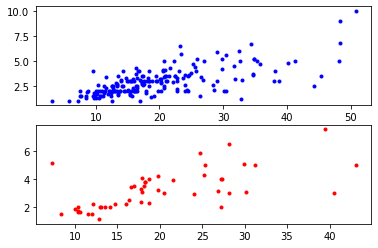

In [109]:
fig, axes = plt.subplots(2, 1)

axes[0].plot(x_train, y_train, 'b.')
axes[1].plot(x_test, y_test, 'r.')

In [111]:
# 선형회귀 모델 생성

lr = LinearRegression()
lr.fit(x_train, y_train) # train 데이터 학습

LinearRegression()

In [112]:
# 기울기, 절편

[lr.coef_,lr.intercept_]

[array([[0.10403177]]), array([0.88872018])]

In [113]:
f = lambda x: lr.intercept_ + (lr.coef_ * x)

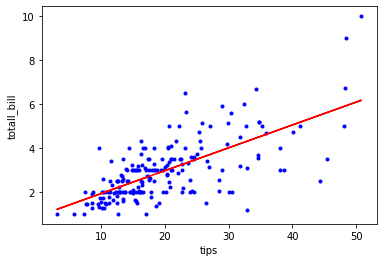

In [126]:
plt.plot(x_train, y_train, 'b.')
plt.xlabel('tips')
plt.ylabel('totall_bill')
plt.plot(X, f(X), color = 'r')

선형회귀 모델의 적합도 측정을 위해 예측값과 실제값이 얼마나 가까운지 보고자 할 때, 각 데이터 포인트에 대해 예측값과 실제값의 차이를 제곱 평균값, 즉, 평균 제곱 오차(MSE)로 구하여 알 수 있습니다.
MSE는 일종의 분산에 대응하는 개념입니다.

In [120]:
from sklearn.metrics import mean_squared_error

In [122]:
predict = lr.predict(x_test)

mse = mean_squared_error(y_test, predict)
mse

1.2072217042688491

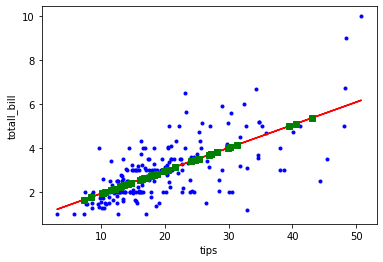

In [157]:
plt.plot(x_train, y_train, 'b.')
plt.xlabel('tips')
plt.ylabel('totall_bill')
plt.plot(X, f(X), color = 'r') # 선형식
plt.plot(x_test, predict, 'gs') # 선형식을 따르는 예측값

MSE는 평균 제곱 오차로 제곱이 되어있기 때문에 실제 오차보다 크게 나타나는 경향이 있습니다 따라서 이에 루트를 씌워 실제 오차값과 비슷하게 확인할 수 있도록 평균 제곱근 오차(RMSE)를 사용할 수 있습니다. 이는 표준편차에 대응하는 개념입니다.

In [123]:
rmse = np.sqrt(mse)
rmse

1.0987364125525507

마지막으로 결정계수는 모형의 적합도를 평가하는 하나의 기준입니다.

결정계수는 설명 가능한 변동 / 총변동 으로 전체 확률 - 설명 불가능한 변동 / 총 변동으로 구할 수 있습니다.

- SST (총변동)

- SSR (설명 가능한 오차)

- SSE (설명 불가능한 오차)

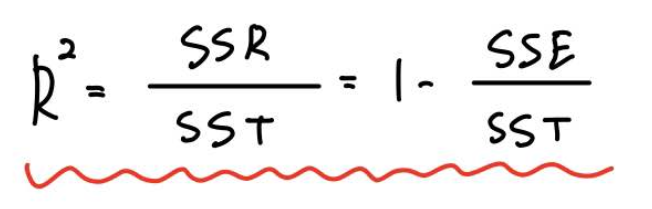

이해를 돕기 위해 아래의 예제를 살펴봅시다. 

- 회귀를 사용하지 않았을 때 제곱한 잔차의 합 : 40

- 회귀를 사용했을 때 제곱한 잔차의 합 : 10

- 줄어든 제곱한 잔차의 합 : 40 - 10 = 30

이를 백분율로 나타내면 아래와 같습니다.



In [147]:
print(1 - (40- 10 / 40) * 1/100 ,'%')

0.6025 %


이렇게 계산된 약 60%라는 값은 결정계수 R^2이며 결정계수는 x에 대한 회귀 분석을 통해 변수 y의 변동비율과 회귀 모델의 설명력을 나타냅니다.

In [148]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predict)
r2

0.386064990710823